4 Coordinate Model Using Full Paths

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# get the main paths
df = pd.read_csv('../simulations/data/paths.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   name           104 non-null    object 
 2   latitude_1     104 non-null    float64
 3   longitude_1    104 non-null    float64
 4   latitude_2     104 non-null    float64
 5   longitude_2    104 non-null    float64
 6   latitude_3     104 non-null    float64
 7   longitude_3    104 non-null    float64
 8   latitude_4     104 non-null    float64
 9   longitude_4    104 non-null    float64
 10  latitude_5     104 non-null    float64
 11  longitude_5    104 non-null    float64
 12  latitude_6     104 non-null    float64
 13  longitude_6    104 non-null    float64
 14  latitude_7     104 non-null    float64
 15  longitude_7    104 non-null    float64
 16  latitude_8     104 non-null    float64
 17  longitude_8    104 non-null    float64
 18  latitude_9

In [4]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,latitude_2,longitude_2,latitude_3,longitude_3,latitude_4,longitude_4,...,longitude_16,latitude_17,longitude_17,latitude_18,longitude_18,latitude_19,longitude_19,latitude_20,longitude_20,enter-parking
0,0,1_A_Missed,36.109640,-115.140945,36.109676,-115.140893,36.109710,-115.140870,36.109762,-115.140860,...,-115.140923,36.110641,-115.140944,36.110660,-115.140983,36.110684,-115.141025,36.110713,-115.141055,0
1,1,2_A_Missed,36.109705,-115.140733,36.109702,-115.140785,36.109699,-115.140841,36.109741,-115.140857,...,-115.141093,36.110496,-115.141143,36.110548,-115.141190,36.110591,-115.141199,36.110651,-115.141182,0
2,2,3_A_Missed,36.109626,-115.140134,36.109675,-115.140140,36.109724,-115.140166,36.109730,-115.140230,...,-115.140790,36.110555,-115.140896,36.110686,-115.140910,36.110808,-115.140852,36.111009,-115.140862,0
3,3,4_A_Missed,36.109592,-115.140132,36.109662,-115.140159,36.109716,-115.140219,36.109716,-115.140310,...,-115.140889,36.110771,-115.140861,36.110981,-115.140853,36.111165,-115.140856,36.111302,-115.140917,0
4,4,5_A_Missed,36.109642,-115.141901,36.109649,-115.141793,36.109654,-115.141658,36.109711,-115.141601,...,-115.140886,36.110796,-115.140852,36.110958,-115.140852,36.111102,-115.140854,36.111243,-115.140892,0


In [5]:
# Split up
def split_data(amount, data):
    """
    Splits the columns of the data and returns a new data frame
    Args:
        amount:

    Returns:

    """
    # Create dataframe columns first
    columns = []
    for index in range(1, amount + 1):
        latitude = 'latitude_' + str(index)
        longitude = 'longitude_' + str(index)
        columns.append(latitude)
        columns.append(longitude)

    columns.append('enter-parking')

    coord1 = data[data.columns[2:10]].values
    coord1 = np.column_stack((coord1, data['enter-parking'].values))

    coord2 = data[data.columns[10:18]].values
    coord2 = np.column_stack((coord2, data['enter-parking'].values))

    coord3 = data[data.columns[18:26]].values
    coord3 = np.column_stack((coord3, data['enter-parking'].values))

    coord4 = data[data.columns[26:34]].values
    coord4 = np.column_stack((coord4, data['enter-parking'].values))

    coord5 = data[data.columns[34:42]].values
    coord5 = np.column_stack((coord5, data['enter-parking'].values))

    all_coords = np.concatenate((coord1, coord2, coord3, coord4, coord5), axis=0)

    new_data = pd.DataFrame(all_coords, columns=columns)

    new_data = new_data.astype({'enter-parking': np.int})

    return new_data

new_df = split_data(4, df)

pass

/var/folders/wk/h60chv5j375gp16jtms5f00r0000gn/T/ipykernel_77076/1238765685.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_data = new_data.astype({'enter-parking': np.int})


In [6]:
# Get The cordinates for x
x = new_df[new_df.columns[:8]]

# Get the last coordinate
y = new_df['enter-parking'].values

In [7]:
print(x)
print(y)

     latitude_1  longitude_1  latitude_2  longitude_2  latitude_3  \
0     36.109640  -115.140945   36.109676  -115.140893   36.109710   
1     36.109705  -115.140733   36.109702  -115.140785   36.109699   
2     36.109626  -115.140134   36.109675  -115.140140   36.109724   
3     36.109592  -115.140132   36.109662  -115.140159   36.109716   
4     36.109642  -115.141901   36.109649  -115.141793   36.109654   
..          ...          ...         ...          ...         ...   
515   36.110666  -115.139378   36.110664  -115.139467   36.110665   
516   36.111015  -115.139487   36.110961  -115.139489   36.110940   
517   36.110554  -115.139594   36.110592  -115.139721   36.110595   
518   36.110684  -115.139396   36.110775  -115.139442   36.110864   
519   36.110582  -115.139857   36.110582  -115.139943   36.110609   

     longitude_3  latitude_4  longitude_4  
0    -115.140870   36.109762  -115.140860  
1    -115.140841   36.109741  -115.140857  
2    -115.140166   36.109730  -115.1402

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=63)

In [9]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [10]:
x_train.shape

(390, 8)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Model creation
model = Sequential()

# 8 neurons for input layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.3))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

In [12]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=250,
                    validation_data=(x_test, y_test),
                    callbacks=early_stop,
                    shuffle=True)

Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-07-14 22:24:51.880617: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-14 22:24:51.880898: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


 1/13 [=>............................] - ETA: 2s - loss: 0.6734 - accuracy: 0.6562WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x15607b5e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - 0s 23ms/step - loss: 0.7052 - accuracy: 0.5243 - val_loss: 0.7256 - val_accuracy: 0.5846
Epoch 2/

In [13]:
losses = pd.DataFrame(model.history.history)

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

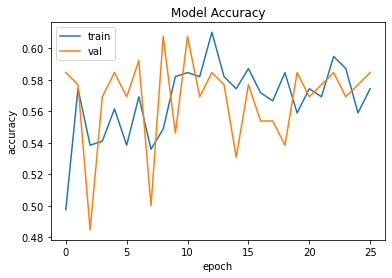

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

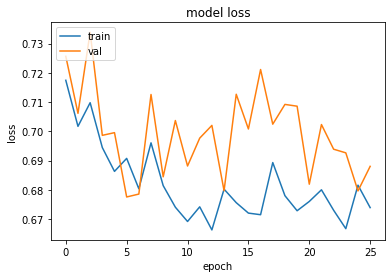

In [16]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
test_df = pd.read_csv('../simulations/data/test_paths.csv')

In [18]:
new_test_df = split_data(4, test_df)

/var/folders/wk/h60chv5j375gp16jtms5f00r0000gn/T/ipykernel_77076/1238765685.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_data = new_data.astype({'enter-parking': np.int})


In [19]:
test_x = new_test_df[new_test_df.columns[:8]]

test_y = new_test_df['enter-parking'].values

In [20]:
test_x = scaler.transform(test_x)

In [21]:
print(test_x)

print(test_y)

[[ 0.04716029  0.27907406  0.04434847  0.26916168  0.06253496  0.27091275
   0.10946606  0.26053305]
 [ 0.07032255  0.45708181  0.07443321  0.44263712  0.09901646  0.42737734
   0.13523126  0.41517327]
 [ 0.06618357  0.30786408  0.068979    0.29301451  0.09290333  0.27722033
   0.13311249  0.26416077]
 [ 0.09274035  0.10991671  0.09707398  0.10592138  0.12286627  0.09220515
   0.16302348  0.08327734]
 [ 0.08372213  0.77581539  0.07815396  0.76736359  0.10112551  0.75697382
   0.13749377  0.74860145]
 [ 0.09064393  0.78643653  0.0947253   0.77724825  0.12237703  0.76889883
   0.16135469  0.76532944]
 [ 0.07338572  0.41979169  0.05794098  0.38243952  0.08002516  0.35305104
   0.11646365  0.32584364]
 [ 0.36153614  0.69738297  0.3702168   0.68869786  0.39152137  0.68356185
   0.42801661  0.68003158]
 [ 0.77497896 -0.08015084  0.77553681 -0.07453306  0.78545886 -0.0707799
   0.79695308 -0.06196397]
 [ 0.07348944  0.5066595   0.08075775  0.46515565  0.11471895  0.43421038
   0.15628993  0.4

In [22]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 

In [23]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.31      0.13      0.19        30
           1       0.58      0.80      0.67        45

    accuracy                           0.53        75
   macro avg       0.44      0.47      0.43        75
weighted avg       0.47      0.53      0.48        75



In [24]:
print(confusion_matrix(test_y, predictions))

[[ 4 26]
 [ 9 36]]
